<big><i>
All the Notebooks in this lecture series by **[Abdul Aziz MD](https://www.linkedin.com/in/abdul-aziz-md/)**
</i></big>

<center><i>
<h1>EDA on Titanic Dataset</h1>
</i></center>

## About the dataset
This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).

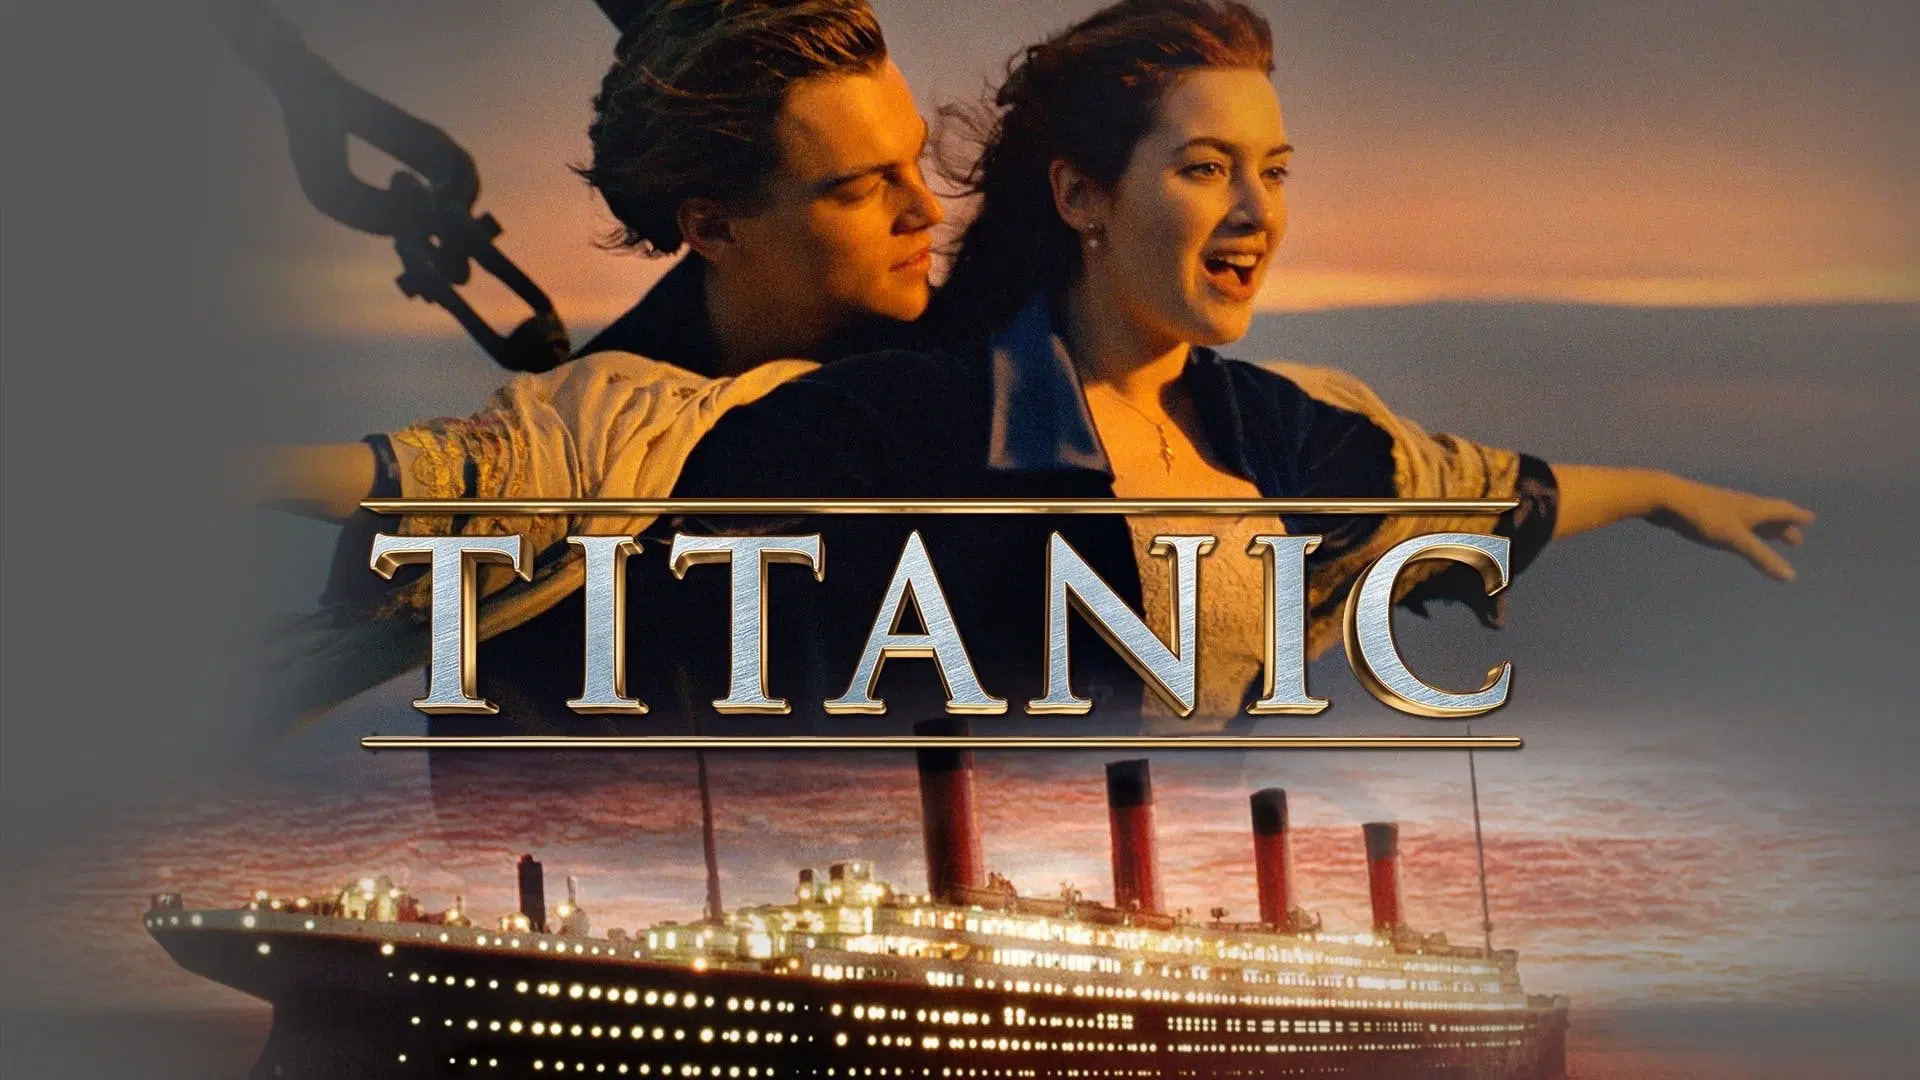


<div> 
    <h2>Importing modules for EDA</h2>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Reading the dataset
</div>

In [2]:
data = sns.load_dataset("titanic")
data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

<div style="background-color:#faa6ce; color:#19180F; font-size:20px; font-family:cursive; padding:10px; border: 2px solid #19180F;"> 
Understand about data
</div>

In [3]:
data.tail()

survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       who  adult_male deck  embark_town alive  alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

In [4]:
data.sample(10)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
287         0       3    male  22.0      0      0   7.8958        S  Third   
882         0       3  female  22.0      0      0  10.5167        S  Third   
745         0       1    male  70.0      1      1  71.0000        S  First   
482         0       3    male  50.0      0      0   8.0500        S  Third   
554         1       3  female  22.0      0      0   7.7750        S  Third   
813         0       3  female   6.0      4      2  31.2750        S  Third   
601         0       3    male   NaN      0      0   7.8958        S  Third   
445         1       1    male   4.0      0      2  81.8583        S  First   
370         1       1    male  25.0      1      0  55.4417        C  First   
174         0       1    male  56.0      0      0  30.6958        C  First   

       who  adult_male deck  embark_town alive  alone  
287    man        True  NaN  Southampton    no   True  
882  woman       False  NaN  Southampton    no   True  
745    man        True    B  Southampton    no  False  
482    man        True  NaN  Southampton    no   True  
554  woman       False  NaN  Southampton   yes   True  
813  child       False  NaN  Southampton    no  False  
601    man        True  NaN  Southampton    no   True  
445  child       False    A  Southampton   yes  False  
370    man        True    E    Cherbourg   yes  False  
174    man        True    A    Cherbourg    no   True

In [5]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [6]:
data.shape

(891, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

This data set having null values at listed columns `age`, `embarked`,`deck`,`embark_town`. So let's remove the columns.  And also some of the columns were repeated. let's remove those columns too.

#### Creating a copy of the orignal DataFrame to do the some requires changes.

In [9]:
final_df = data.copy()
final_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [12]:
final_df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [13]:
final_df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [10]:
final_df.embark_town.mode()

0    Southampton
Name: embark_town, dtype: object

In [14]:
final_df.dropna(subset=['age'], inplace=True)
final_df.drop("deck",axis=1,inplace=True)
final_df.drop(["embarked","survived","pclass","adult_male","alone"],axis=1,inplace=True)
final_df['embark_town'].fillna(final_df['embark_town'].mode()[0], inplace=True)

In [15]:
final_df.isnull().sum()

sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
embark_town    0
alive          0
dtype: int64

<Axes: xlabel='who', ylabel='count'>

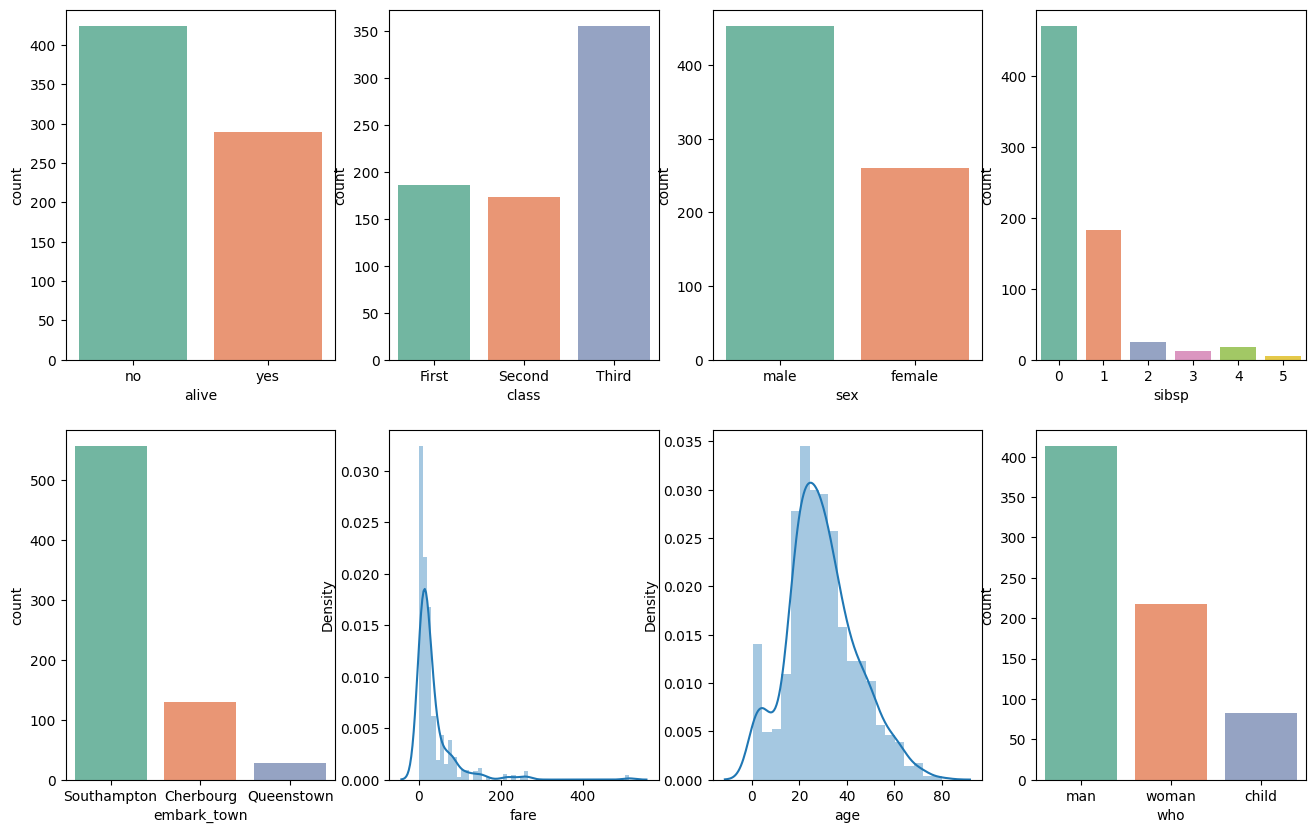

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.countplot(x='alive',data=final_df,ax=axes[0,0],palette='Set2')
sns.countplot(x='class',data=final_df,ax=axes[0,1],palette='Set2')
sns.countplot(x='sex',data=final_df,ax=axes[0,2],palette='Set2')
sns.countplot(x='sibsp',data=final_df,ax=axes[0,3],palette='Set2')
sns.countplot(x='embark_town',data=final_df,ax=axes[1,0],palette='Set2')
sns.distplot(final_df['fare'], kde=True,ax=axes[1,1])
sns.distplot(final_df['age'].dropna(),kde=True,ax=axes[1,2])
sns.countplot(x='who',data=final_df,ax=axes[1,3],palette='Set2')

## Let's visualize the distribution of ages of the passengers.

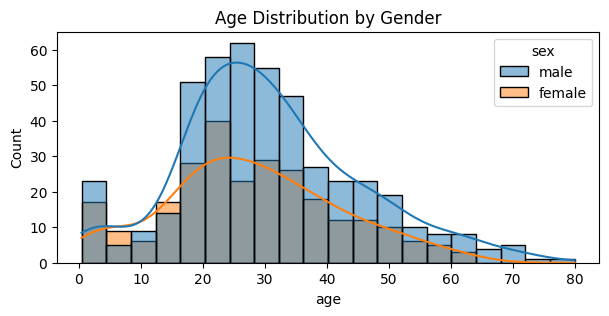

In [17]:
plt.figure(figsize=(7, 3))
sns.histplot(data=final_df, x='age', kde=True, hue='sex')
plt.title('Age Distribution by Gender')
plt.show()

## Let's analyze survival rates based on passenger class.

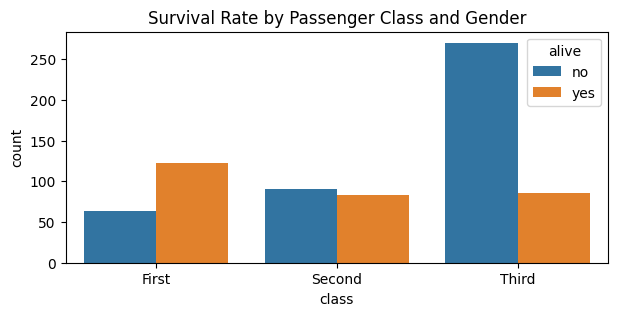

In [18]:
plt.figure(figsize=(7, 3))
sns.countplot(data=final_df, x='class',hue='alive')
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

## Let's analyze survival rates based on sex.

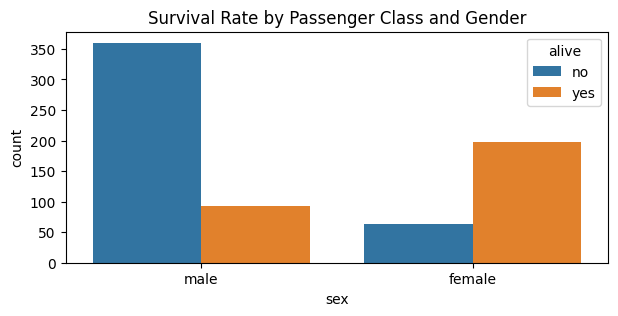

In [19]:
plt.figure(figsize=(7, 3))
sns.countplot(data=final_df, x='sex',hue='alive')
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()

## Let's analyze survival rates based on embarkation port.

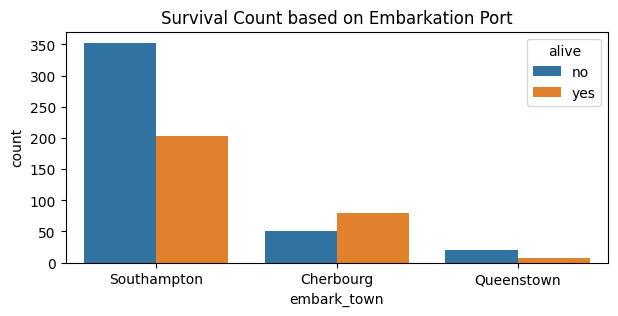

In [20]:
plt.figure(figsize=(7, 3))
sns.countplot(data=final_df, x='embark_town', hue='alive')
plt.title('Survival Count based on Embarkation Port')
plt.show()

## Let's analyze survival based on fare and class.

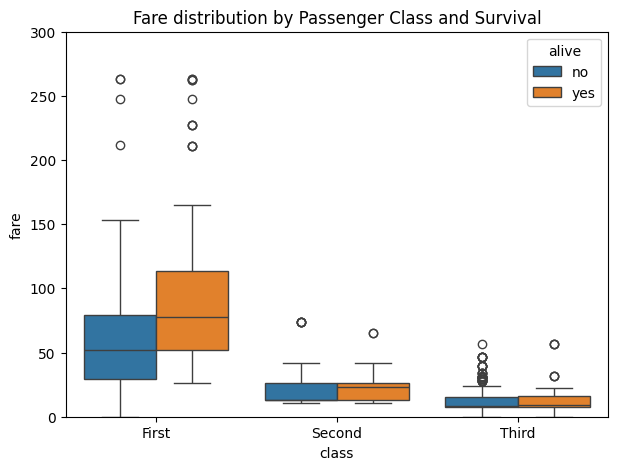

In [21]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=final_df, x='class', y='fare', hue='alive')
plt.ylim(0, 300)  # Limiting y-axis to 300 for better visualization
plt.title('Fare distribution by Passenger Class and Survival')
plt.show()

## Let's see the survival count based on the family size.

Creating a new column 'FamilySize' by adding 'sibsp' & 'parch'

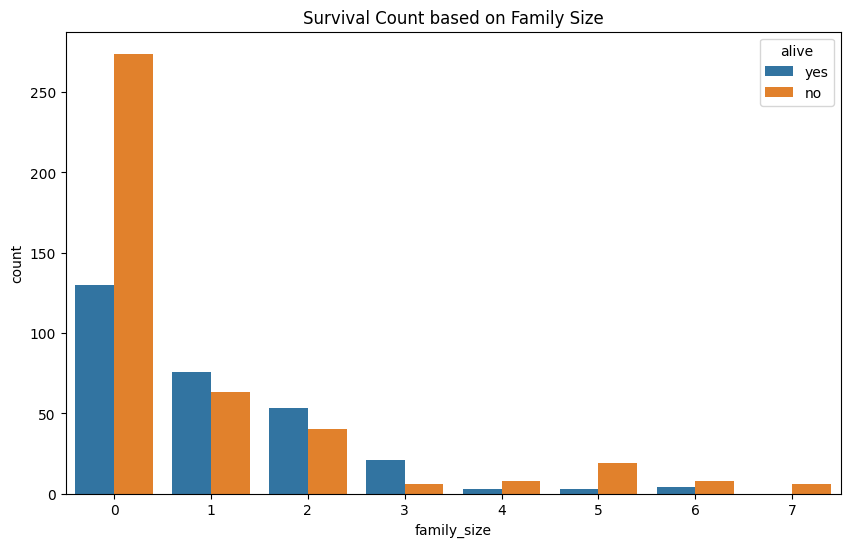

In [22]:
final_df['family_size'] = final_df['sibsp'] + final_df['parch']
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df, x='family_size', hue='alive')
plt.title('Survival Count based on Family Size')
plt.show()

## Let's analyze survival rates by the number of siblings/spouses aboard

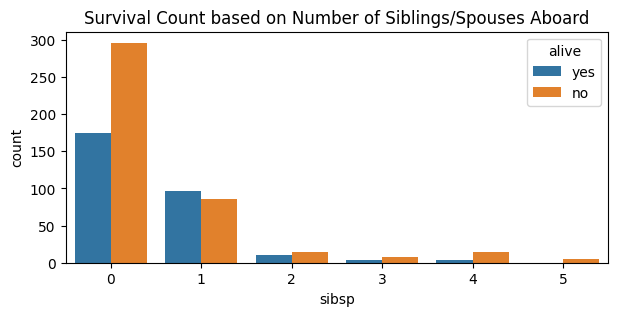

In [23]:
plt.figure(figsize=(7, 3))
sns.countplot(data=final_df, x='sibsp', hue='alive')
plt.title('Survival Count based on Number of Siblings/Spouses Aboard')
plt.show()

# Data Analysis Findings

#### Based on the analysis we've discussed above, here's a summary of findings for the Titanic incident:


- **Gender and Survival:** Women had a significantly higher survival rate than men.
- **Passenger Class:** First-class passengers had a higher survival rate, indicating socio-economic status played a role in survival chances.
- **Embarkation Port:** The survival count varied based on the embarkation port, potentially reflecting the socio-economic distribution of passengers from these ports.
- **Fare Distribution:** The majority of passengers paid lower fares, aligning with a larger number of third-class tickets.
  

- **Fare and Survival:** Within each passenger class, there wasn't a consistent pattern to suggest that higher fares directly led to better survival chances.
  

- **Siblings/Spouses:** Those with one sibling or spouse onboard seemed to have a slightly better survival rate than those alone or with many siblings/spouses.
  

- **Parents/Children:** Passengers traveling alone or with one parent/child had higher survival rates compared to larger families.
  

- **Family Size:** Solo travelers and those with a small family size (1-3 members) had better survival outcomes than larger families.

  

- **Age Distribution:** Younger passengers (children) had a better survival rate, while the elderly had lower survival chances. Middle-aged individuals, especially males, formed the bulk of casualties.

# Happy Learning 😊